In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


In [4]:
df = pd.read_csv('/home/omo/Desktop/Data Science/Recess/Geoff/homeprices.csv')

In [6]:
df.head(100)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [10]:
# Using pandas for one hot encoding 

dummies = pd.get_dummies(df.town).astype(int)

In [198]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [11]:
# Concartenate the dummies with the original dataframe 
merged = pd.concat([df,dummies],axis='columns')

In [13]:
merged #this is the merged dataframe

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [15]:
df  #this is the original dataframe

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [16]:
df = merged # this is to assign merged to df

In [18]:
df.head() # this is our new df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0


In [21]:
df = df.drop('town',axis=1) # we are dropping the town 

In [22]:
df.head()

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0


In [23]:
# We should also drop one of the encoded variables to avoid dummy variables trap 
df = df.drop('monroe township',axis=1)

In [24]:
df.head()

,area,price,robinsville,west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0


In [28]:
# Creating the model

from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
X = df.drop('price',axis=1)

In [34]:
y = df['price']

In [35]:
model.fit(X,y)

LinearRegression()

In [44]:
predictions = model.predict(X)

In [48]:
model.predict([[2800,0,1]])

/home/omo/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([605103.20361213])

In [47]:
X

,area,robinsville,west windsor
0,2600,0,0
1,3000,0,0
2,3200,0,0
3,3600,0,0
4,4000,0,0
5,2600,0,1
6,2800,0,1
7,3300,0,1
8,3600,0,1
9,2600,1,0


In [50]:
model.score(X,y)

0.9573929037221871

#### Sklearn Onehot Encoder and Dummy Variables

In [52]:
df1  = pd.read_csv('/home/omo/Desktop/MachineLearning/machinelearning/LinearRegressionDatasets/homeprices.csv')

In [53]:
df1.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


##### One hot encoding in sklearn

In [79]:
# One hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.town = le.fit_transform(df1.town) # Creating the Labels for the categorical variables

In [74]:
df1 # Converted to integer numbers

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [75]:
X_df1 = df1.drop('price',axis=1).values # we call values inorder to change it to 2D array

In [76]:
X_df1 

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [77]:
y_df1 = df1['price']

In [78]:
y_df1

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

##### Dummy Variables in sklearn

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_features=[0]  # we converting the categorical features at position column 0 
ohe = ColumnTransformer(
     transformers=[('encoder', OneHotEncoder(), categorical_features)],
     remainder='passthrough'
) 
X_df1_encoded = ohe.fit_transform(X_df1) # creating  dummy variables columns which are 1,0,0 
X_df1_encoded 

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [85]:
X_df1  # the original X_df1 was not encoded into dummy variables

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [86]:
# We need to drop one of dummy columns to avoid dummy variable trap 
X_df1_encoded = X_df1_encoded[:,1:]

In [89]:
X_df1_encoded # 1 first column dropped

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model_df1 = LinearRegression()

In [96]:
model_df1.fit(X_df1_encoded,y_df1)

LinearRegression()

In [101]:
model_df1.predict(X_df1_encoded)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781552, 579723.71533004, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.1513653 , 603465.38378843, 628844.87207052,
       692293.59277574])

In [102]:
model_df1.predict([[1,0,2800]])

array([590775.63964739])

## Use of Carprices.csv to do the Onehot and dummy variables using sklearn

In [161]:
df3 = pd.read_csv('/home/omo/Desktop/MachineLearning/machinelearning/LinearRegressionDatasets/carprices.csv')

In [162]:
df3.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


<Axes: >

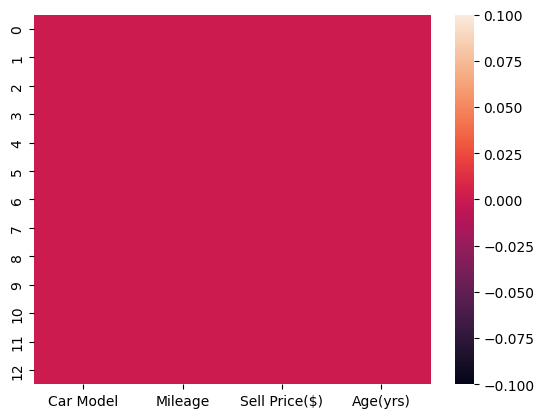

In [163]:
sns.heatmap(df3.isnull()) # the data is clean

In [164]:
df3.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

In [165]:
df3.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [166]:
df3=df3.rename(columns={'Sell Price($)':'Price',
                    'Car Model':'Car_Model',
                    'Age(yrs)':'Age'}) # Renaming the column name which is weirdly named

In [167]:
# USING SKLEARN TO DO ONE HOT ENCODING


In [168]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3.Car_Model = label_encoder.fit_transform(df3.Car_Model)  

In [169]:
df3  # It has been encoded

,Car_Model,Mileage,Price,Age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [170]:
X_df3 = df3.drop('Price',axis=1)

In [171]:
y_df3 = df3['Price']

In [172]:
X_df3

,Car_Model,Mileage,Age
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [173]:
# Transforming the categorical column  of X_df3 into dummy variables columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_features=[0]  # we converting the categorical features at position column 0 
ohe = ColumnTransformer(
     transformers=[('encoder', OneHotEncoder(), categorical_features)],
     remainder='passthrough'
) 
X_df3_encoded = ohe.fit_transform(X_df3) # creating  dummy variables columns which are now 0,1,0
X_df3_encoded 

# Note: Never run this cell twice

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [184]:
# We need to drop one of dummy columns to avoid dummy variable trap 
X_df3_encoded = X_df3_encoded[:,1:]

In [185]:
X_df3_encoded

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [186]:
X_df3

,Car_Model,Mileage,Age
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [187]:
from sklearn.linear_model import LinearRegression

In [176]:
model_df3 = LinearRegression()

In [177]:
model_df3.fit(X_df3,y_df3)

LinearRegression()

In [193]:
model_df3.predict(X_df3)

array([22855.47176747, 36101.34690856, 27545.28569062, 40997.05248879,
       31823.31629959, 25620.04649333, 28502.52969256, 20518.449256  ,
       13197.73798059, 24780.71096476, 18443.76378491, 20090.89704162,
       27823.3916312 ])

In [197]:
model_df3.score(X_df3,y_df3)

0.8719970367825953